In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('V3.csv')

In [7]:
df.head(10)

,DATE_ID,CAMPAIGN,KEYWORD,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST,CTR,Flag,CAMP_ID,week,KW_ID,Q,NETWORK_Bing,NETWORK_Google,NETWORK_Yahoo,CAMPAIGN_TYPE_Branded,CAMPAIGN_TYPE_Unbranded,ID_Key
0,20170521,Non Brand | Condition | Geo,symptoms of asthma,2.08,3,1.80,51,5.40,0.058824,1,1,7,1,2,0,1,0,0,1,1000
1,20170521,Brand,product1 spacer,1.00,0,0.00,2,0.00,0.000000,0,2,7,2,2,0,1,0,1,0,1001
2,20170521,Non Brand | Treatment | National,how to prevent asthma,1.48,0,0.00,4,0.00,0.000000,0,3,7,3,2,0,1,0,0,1,1002
3,20170521,Non Brand | Info | Geo,facts about asthma,0.00,0,0.00,0,0.00,0.000000,0,4,7,4,2,1,0,0,0,1,1003
4,20170521,Non Brand | Condition | Geo,asthma symptoms in children,0.00,0,0.00,0,0.00,0.000000,0,1,7,5,2,1,0,0,0,1,1004
5,20170521,Non Brand | Treatment | Geo,how to reduce asthma symptoms,2.00,0,0.00,1,0.00,0.000000,0,5,7,6,2,0,1,0,0,1,1005
6,20170521,Non Brand | Condition | Geo,breathing with asthma,2.00,1,3.71,4,3.71,0.250000,1,1,7,7,2,0,1,0,0,1,1006
7,20170521,Non Brand | Competitor | Geo,alternatives to competitor6,4.00,0,0.00,1,0.00,0.000000,0,6,7,8,2,0,1,0,0,1,1007
8,20170521,Non Brand | Product | Geo,best inhaler for asthma,3.31,0,0.00,7,0.00,0.000000,0,7,7,9,2,0,1,0,0,1,1008
9,20170521,Non Brand | Product | Geo,asthmatic inhalers,4.00,0,0.00,3,0.00,0.000000,0,7,7,10,2,0,1,0,0,1,1009


#### Review top 100 keywords

In [8]:
df.KEYWORD.value_counts()

asthma inhalers                                                                                             1771
asthma medications                                                                                          1725
inhalers for asthma                                                                                         1713
asthma relief                                                                                               1688
asthma symptoms                                                                                             1678
asthma medication                                                                                           1644
asthma coughing                                                                                             1618
asthma action plan                                                                                          1614
asthma symptom                                                                                  

In [9]:
from collections import Counter
z = Counter(df.KW_ID).most_common(1000)

In [10]:
Counter(df.KEYWORD).most_common(100)

[('asthma inhalers', 1771),
 ('asthma medications', 1725),
 ('inhalers for asthma', 1713),
 ('asthma relief', 1688),
 ('asthma symptoms', 1678),
 ('asthma medication', 1644),
 ('asthma coughing', 1618),
 ('asthma action plan', 1614),
 ('asthma symptom', 1605),
 ('what is asthma', 1601),
 ('symptoms of asthma', 1598),
 ('asthma inhaler', 1597),
 ('asthma medicine', 1581),
 ('asthma treatment', 1577),
 ('help asthma', 1551),
 ('asthma medicines', 1539),
 ('competitor5 inhaler', 1489),
 ('asthma triggers', 1481),
 ('competitor6 inhaler', 1477),
 ('what causes asthma', 1476),
 ('asthma control', 1466),
 ('treatment for asthma', 1444),
 ('over the counter asthma inhalers', 1443),
 ('medicine for asthma', 1433),
 ('asthma treatments', 1430),
 ('cause asthma', 1430),
 ('how to treat asthma', 1427),
 ('help with asthma', 1420),
 ('symptom of asthma', 1406),
 ('inhalation aerosol', 1401),
 ('asthma prevention', 1389),
 ('signs of asthma', 1376),
 ('medications for asthma', 1369),
 ('product1', 

In [11]:
u = []
for i in range(1000):
    u.append(z[i][0])
u

[151,
 198,
 110,
 20,
 207,
 483,
 112,
 28,
 78,
 278,
 1,
 47,
 108,
 114,
 358,
 91,
 66,
 331,
 490,
 188,
 266,
 431,
 245,
 77,
 54,
 85,
 377,
 275,
 56,
 38,
 22,
 340,
 70,
 385,
 383,
 229,
 338,
 75,
 370,
 161,
 120,
 162,
 154,
 69,
 472,
 339,
 150,
 233,
 37,
 201,
 268,
 33,
 83,
 96,
 169,
 164,
 136,
 173,
 288,
 92,
 202,
 3,
 174,
 72,
 203,
 50,
 442,
 337,
 237,
 13,
 276,
 240,
 248,
 131,
 80,
 253,
 251,
 447,
 607,
 62,
 224,
 49,
 440,
 425,
 128,
 58,
 361,
 40,
 342,
 384,
 458,
 88,
 264,
 130,
 393,
 571,
 696,
 211,
 68,
 378,
 422,
 608,
 176,
 395,
 63,
 205,
 521,
 146,
 334,
 26,
 208,
 16,
 180,
 352,
 656,
 467,
 433,
 460,
 452,
 57,
 10,
 166,
 221,
 101,
 534,
 250,
 242,
 410,
 418,
 728,
 420,
 109,
 462,
 718,
 122,
 330,
 406,
 121,
 86,
 529,
 479,
 137,
 686,
 156,
 230,
 316,
 31,
 274,
 11,
 491,
 533,
 277,
 372,
 523,
 5,
 133,
 1819,
 134,
 163,
 204,
 394,
 698,
 93,
 739,
 315,
 290,
 675,
 24,
 124,
 332,
 468,
 157,
 184,
 324,
 

In [12]:
df0 = df.loc[df['KW_ID'].isin(u)]
df0.shape

(463533, 20)

#### Train/Test split

In [13]:
df.Flag.value_counts()

0    405574
1     83193
Name: Flag, dtype: int64

In [14]:
X = df.drop(['DATE_ID','CAMPAIGN','KEYWORD','IMPRESSIONS','CTR','Flag','CLICKS'],axis=1)
Y = df['Flag'].values

In [15]:
X['CAMP_ID'].isnull().sum()

0

In [16]:
np.isfinite(Y).all()

True

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=112)

In [18]:
x_train.head()

,_POSITION,CPC,MEDIA_COST,CAMP_ID,week,KW_ID,Q,NETWORK_Bing,NETWORK_Google,NETWORK_Yahoo,CAMPAIGN_TYPE_Branded,CAMPAIGN_TYPE_Unbranded,ID_Key
438241,0.00,0.00,0.00,41,5,1903,1,0,1,0,0,1,439241
311715,2.27,0.55,1.09,5,7,233,3,1,0,0,0,1,312715
221299,2.00,0.00,0.00,1,2,1419,4,0,1,0,0,1,222299
256698,3.00,0.00,0.00,6,6,1102,3,0,1,0,0,1,257698
443250,3.00,0.00,0.00,11,7,56,1,0,1,0,0,1,444250


#### Random Forest Classifier predicting CTR Flag

In [19]:
clf = RandomForestClassifier(max_depth=15, random_state=113)

In [20]:
clf.fit(x_train, y_train)

C:\Users\manya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=113, verbose=0, warm_start=False)

In [21]:
y_pred_class = clf.predict(x_test)

In [22]:
y_pred_prob = clf.predict_proba(x_test)[:,1]

In [23]:
importances = clf.feature_importances_

In [24]:
indices = np.argsort(importances)[::-1]

In [25]:
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

1. feature CPC (0.498334)
2. feature MEDIA_COST (0.415334)
3. feature _POSITION (0.022664)
4. feature KW_ID (0.021862)
5. feature ID_Key (0.012949)
6. feature CAMP_ID (0.009371)
7. feature CAMPAIGN_TYPE_Unbranded (0.007738)
8. feature CAMPAIGN_TYPE_Branded (0.004384)
9. feature week (0.002567)
10. feature Q (0.001861)
11. feature NETWORK_Bing (0.001521)
12. feature NETWORK_Google (0.001382)
13. feature NETWORK_Yahoo (0.000035)


In [26]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    121610
           1       0.92      0.99      0.95     25021

   micro avg       0.98      0.98      0.98    146631
   macro avg       0.96      0.99      0.97    146631
weighted avg       0.98      0.98      0.98    146631



In [27]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[119371,   2239],
       [   287,  24734]], dtype=int64)

In [28]:
metrics.accuracy_score(y_test, y_pred_class)

0.9827730834543855

In [29]:
sk.metrics.roc_auc_score(y_test, y_pred_prob)

0.997442598673491

In [30]:
y_pred_train = clf.predict(x_train)

print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    283964
           1       0.93      1.00      0.96     58172

   micro avg       0.99      0.99      0.99    342136
   macro avg       0.97      0.99      0.98    342136
weighted avg       0.99      0.99      0.99    342136



In [31]:
false_positive_rate, true_positive_rate, threshold = sk.metrics.roc_curve(y_test, y_pred_prob)

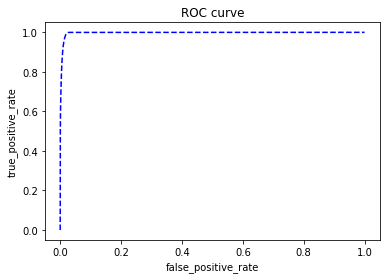

In [32]:
plt.title('ROC curve')
plt.plot(false_positive_rate, true_positive_rate, color='b', ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

#### XGboost Classifier predicting CTR Flag

In [33]:
param_grid = {"n_estimators":[i*20 for i in range(5,100)], "learning_rate": [i*0.1 for i in range(1,17)], 
              "max_depth": [1,2,3], "gamma": [i*0.2 for i in range(0,30)]}

In [34]:
from xgboost import XGBClassifier

In [35]:
bst = XGBClassifier(random_state=223)

In [36]:
bst_Grid = sk.model_selection.RandomizedSearchCV(bst, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 5)

In [37]:
x_train.KW_ID = pd.to_numeric(x_train.KW_ID)
x_train.CAMP_ID = pd.to_numeric(x_train.CAMP_ID)
x_train.KW_ID.dtype, x_train.CAMP_ID.dtype

C:\Users\manya\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(dtype('int64'), dtype('int64'))

In [38]:
bst_Grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 90.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=223, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1..., 4.4, 4.6000000000000005, 4.800000000000001, 5.0, 5.2, 5.4, 5.6000000000000005, 5.800000000000001]},
          pre_d

In [39]:
bst_Grid.best_params_

{'n_estimators': 260, 'max_depth': 3, 'learning_rate': 0.5, 'gamma': 4.2}

In [40]:
x_test.KW_ID = pd.to_numeric(x_test.KW_ID)
x_test.CAMP_ID = pd.to_numeric(x_test.CAMP_ID)

C:\Users\manya\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [41]:
y_pred_xg = bst_Grid.best_estimator_.predict(x_test)
y_pred_xgprob = bst_Grid.best_estimator_.predict_proba(x_test)[:,1]

In [42]:
bst_Grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=4.2,
       learning_rate=0.5, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=260, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=223,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [43]:
metrics.confusion_matrix(y_test, y_pred_xg)

array([[119874,   1736],
       [   516,  24505]], dtype=int64)

In [44]:
print(metrics.classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    121610
           1       0.93      0.98      0.96     25021

   micro avg       0.98      0.98      0.98    146631
   macro avg       0.96      0.98      0.97    146631
weighted avg       0.99      0.98      0.98    146631



In [45]:
sk.metrics.roc_auc_score(y_test, y_pred_xgprob)

0.9981220358403586

In [46]:
metrics.accuracy_score(y_test, y_pred_xg)

0.9846417196909248

In [47]:
y_pred_trainxg = clf.predict(x_train)

print(metrics.classification_report(y_train, y_pred_trainxg))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    283964
           1       0.93      1.00      0.96     58172

   micro avg       0.99      0.99      0.99    342136
   macro avg       0.97      0.99      0.98    342136
weighted avg       0.99      0.99      0.99    342136



In [48]:
false_positive_rate, true_positive_rate, threshold = sk.metrics.roc_curve(y_test, y_pred_xgprob)

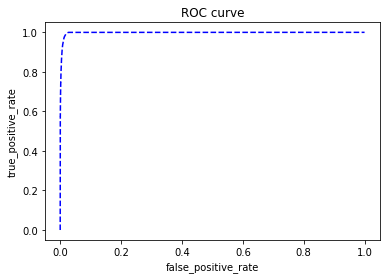

In [49]:
plt.title('ROC curve')
plt.plot(false_positive_rate, true_positive_rate, color='b', ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [52]:
print(y_test)
print(y_pred_xgprob)

[0 0 0 ... 0 0 0]
[2.3245153e-05 5.9407198e-06 2.3607150e-05 ... 6.4723140e-06 5.7269649e-06
 1.4606791e-05]


In [53]:
print(confusion_matrix(y_test, y_pred_xg))

[[119874   1736]
 [   516  24505]]


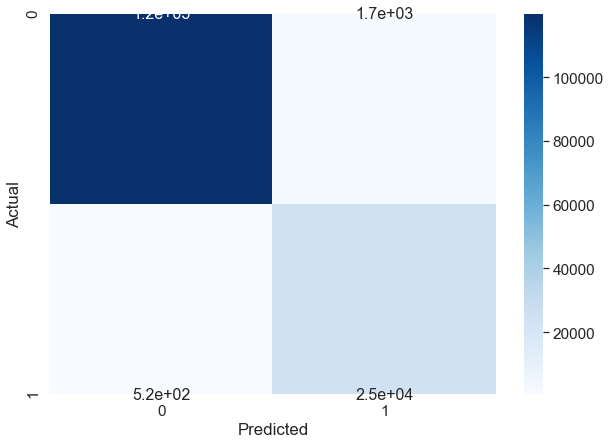

In [56]:
data = confusion_matrix(y_test, y_pred_xg)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [55]:
import seaborn as sn